In [ ]:
! apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

In [ ]:
pip install SciencePlots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os

In [ ]:
plt.style.use(['science'])

In [ ]:
BASE_DIR = '/content/drive/MyDrive/umap_results/checkpoint-645000_gemma32_distributed/'
df = pd.read_csv( os.path.join(BASE_DIR, 'info_rows_umap_first_target.csv') )

In [ ]:
df

,index_sentence,id,index_id,src_lang_code,tgt_lang_code,bos,src_tag_token,last_token,text_token
0,0,1099,3,eng_Latn,glg_Latn,no,no,no,""""
1,0,1812,4,eng_Latn,glg_Latn,no,no,no,We
2,0,3193,5,eng_Latn,glg_Latn,no,no,no,now
3,0,913,6,eng_Latn,glg_Latn,no,no,no,have
4,0,755,7,eng_Latn,glg_Latn,no,no,no,4
...,...,...,...,...,...,...,...,...,...
271,0,25,30,spa_Latn,glg_Latn,no,no,no,","
272,0,15,31,spa_Latn,glg_Latn,no,no,no,""""
273,0,5299,32,spa_Latn,glg_Latn,no,no,no,agre
274,0,398,33,spa_Latn,glg_Latn,no,no,no,go


<ipython-input-6-f284b0ff5e90>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))


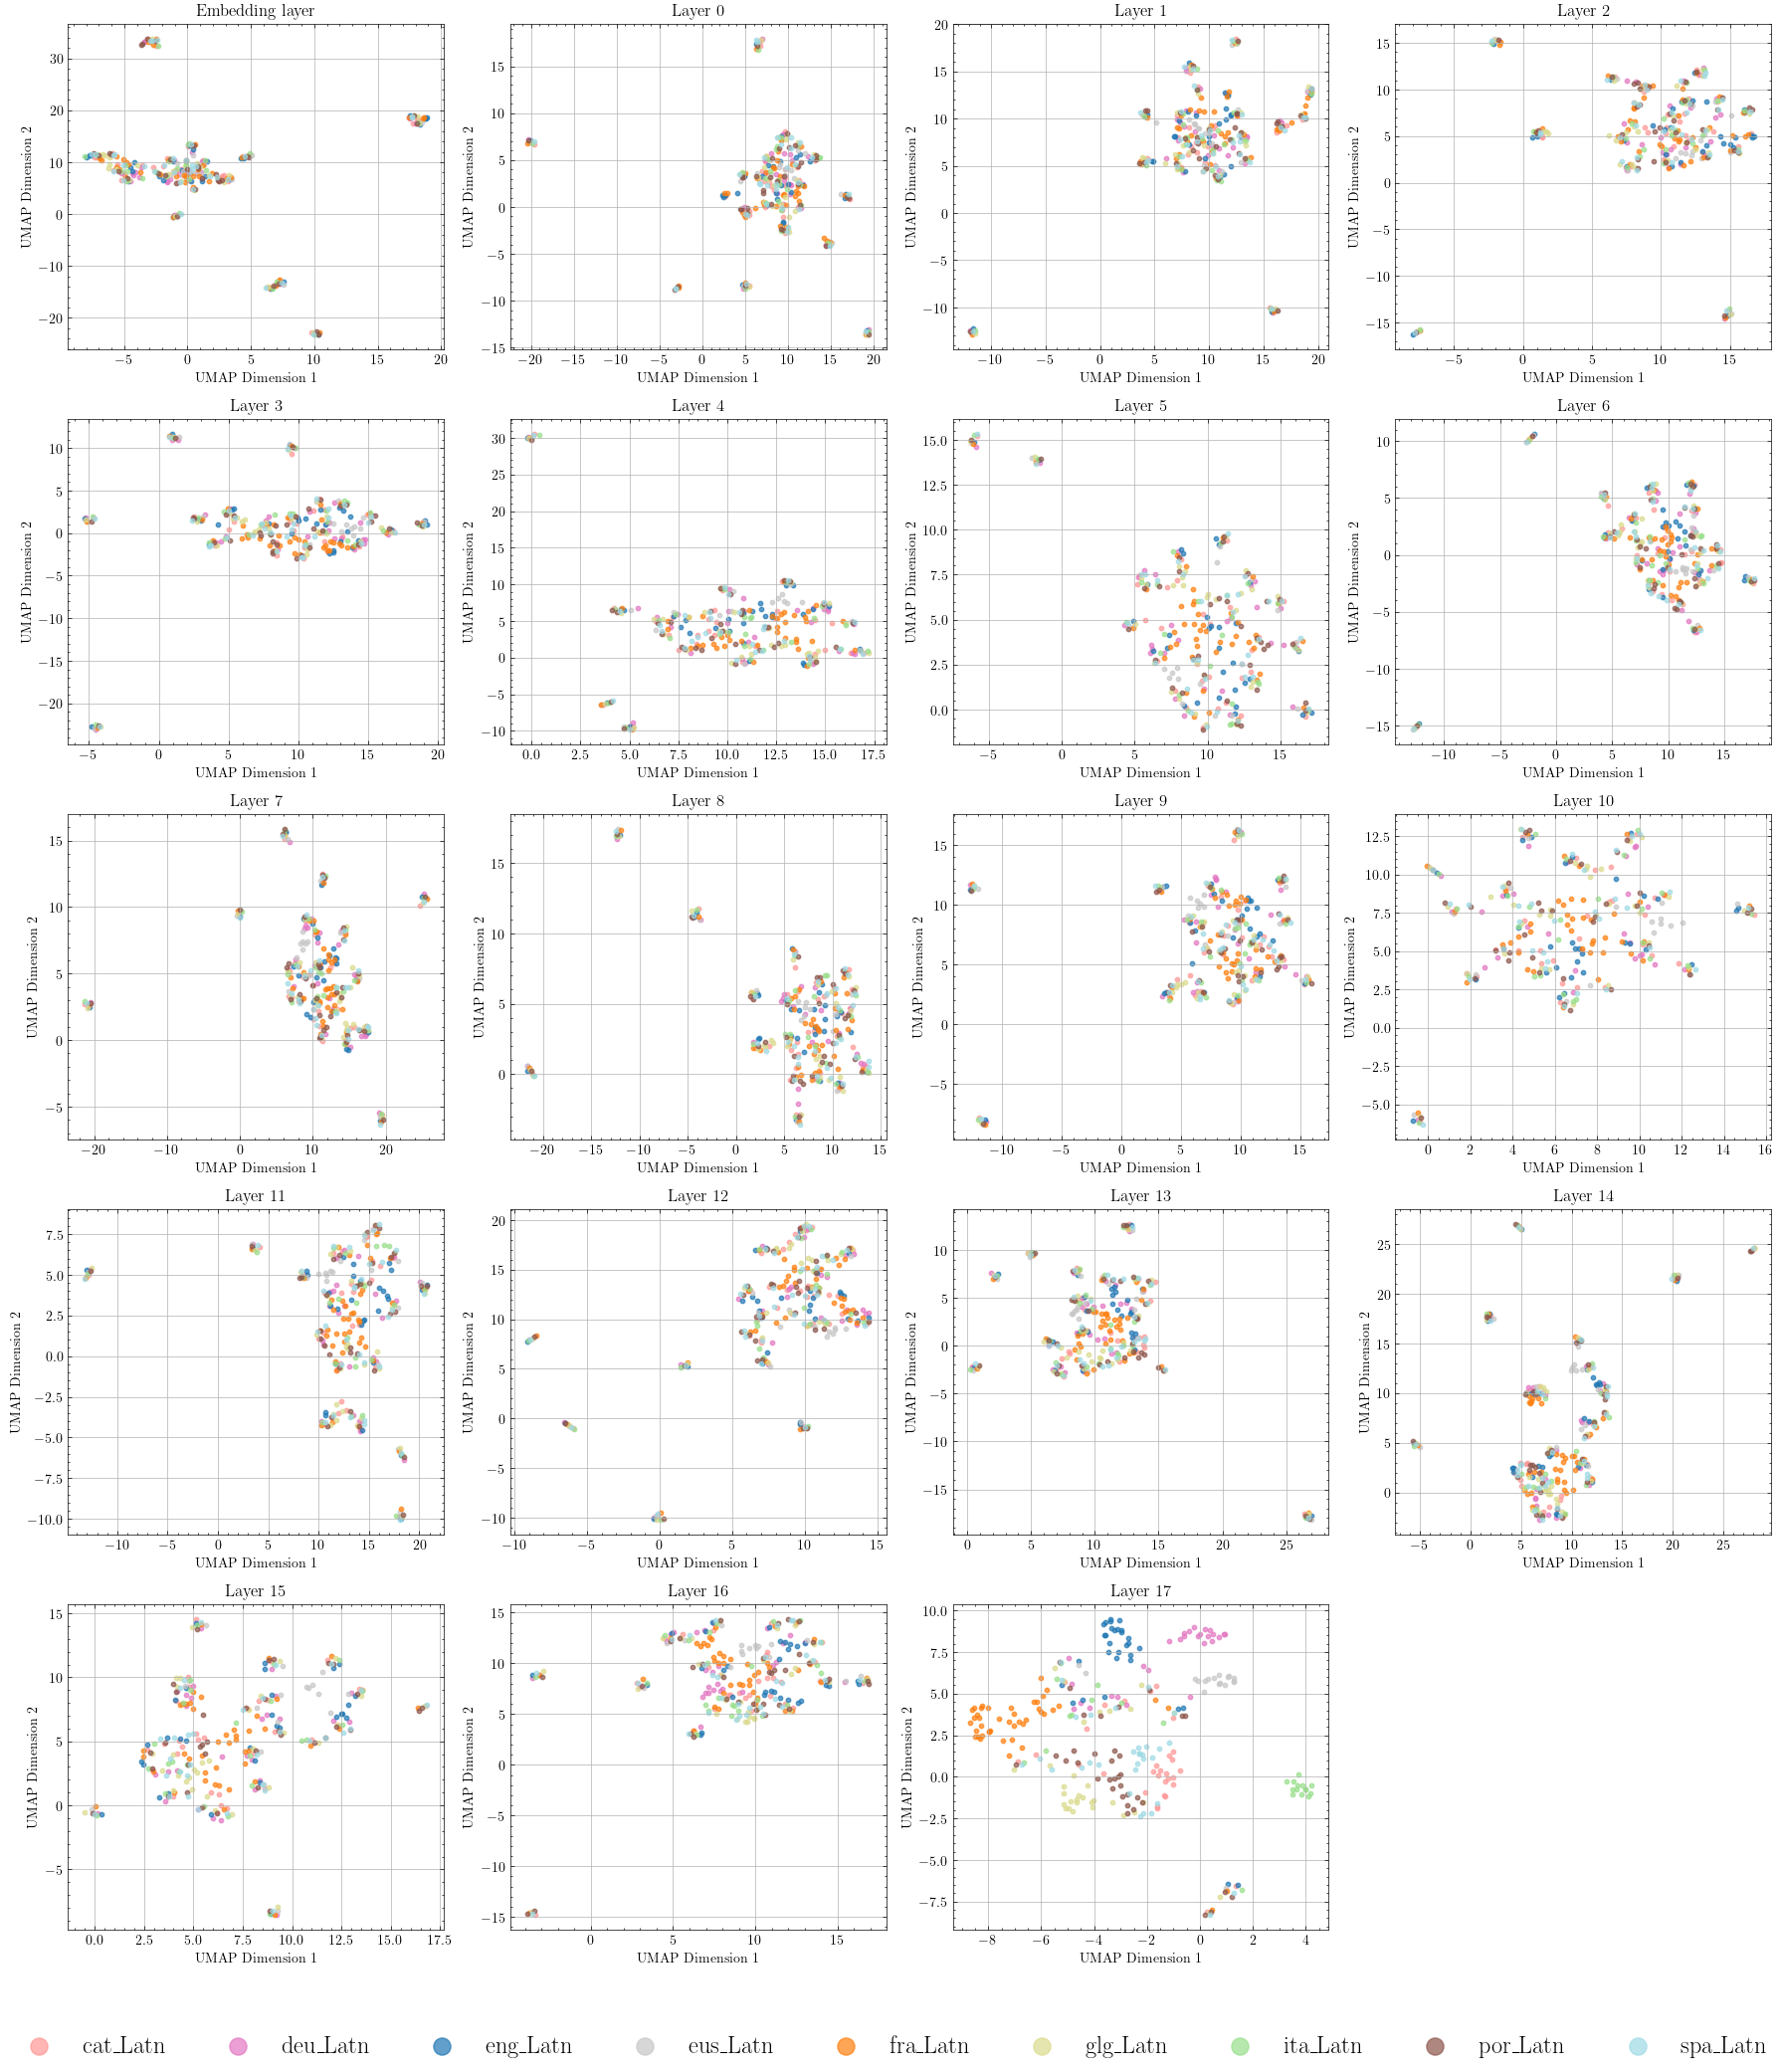

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the language codes
unique_lang_codes = df['src_lang_code'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))
lang_to_color = {lang: colors(i) for i, lang in enumerate(unique_lang_codes)}
df['color'] = df['src_lang_code'].map(lang_to_color)

# Create a figure to hold all subplots
fig, axes = plt.subplots(5, 4, figsize=(18, 20))  # Adjust subplot grid as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for layer in range(19):
    # Adjust the matrix path for each layer
    matrix_path = f'{BASE_DIR}/lang_umap_first_target_layer{layer}.npy'
    matrix = np.load(matrix_path)

    ax = axes[layer]  # Select the appropriate subplot
    for lang, group in df.groupby('src_lang_code'):
        idx = group.index
        if layer == 0:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=10, color=group['color'].iloc[0], label=lang, alpha=0.7)
          ax.set_title(f'Embedding layer')
        else:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=10, color=group['color'].iloc[0], alpha=0.7)
          ax.set_title(f'Layer {layer-1}')

    ax.set_xlabel('UMAP Dimension 1')
    ax.set_ylabel('UMAP Dimension 2')
    ax.grid(True)

# Hide unused subplots if not a perfect square grid
for i in range(19, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and add a global legend
fig.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=9, fontsize=17.5, markerscale=3.9)
plt.savefig('all_plots_32k.pdf', dpi = 200)
plt.show()

<ipython-input-15-e628ffdb8218>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))


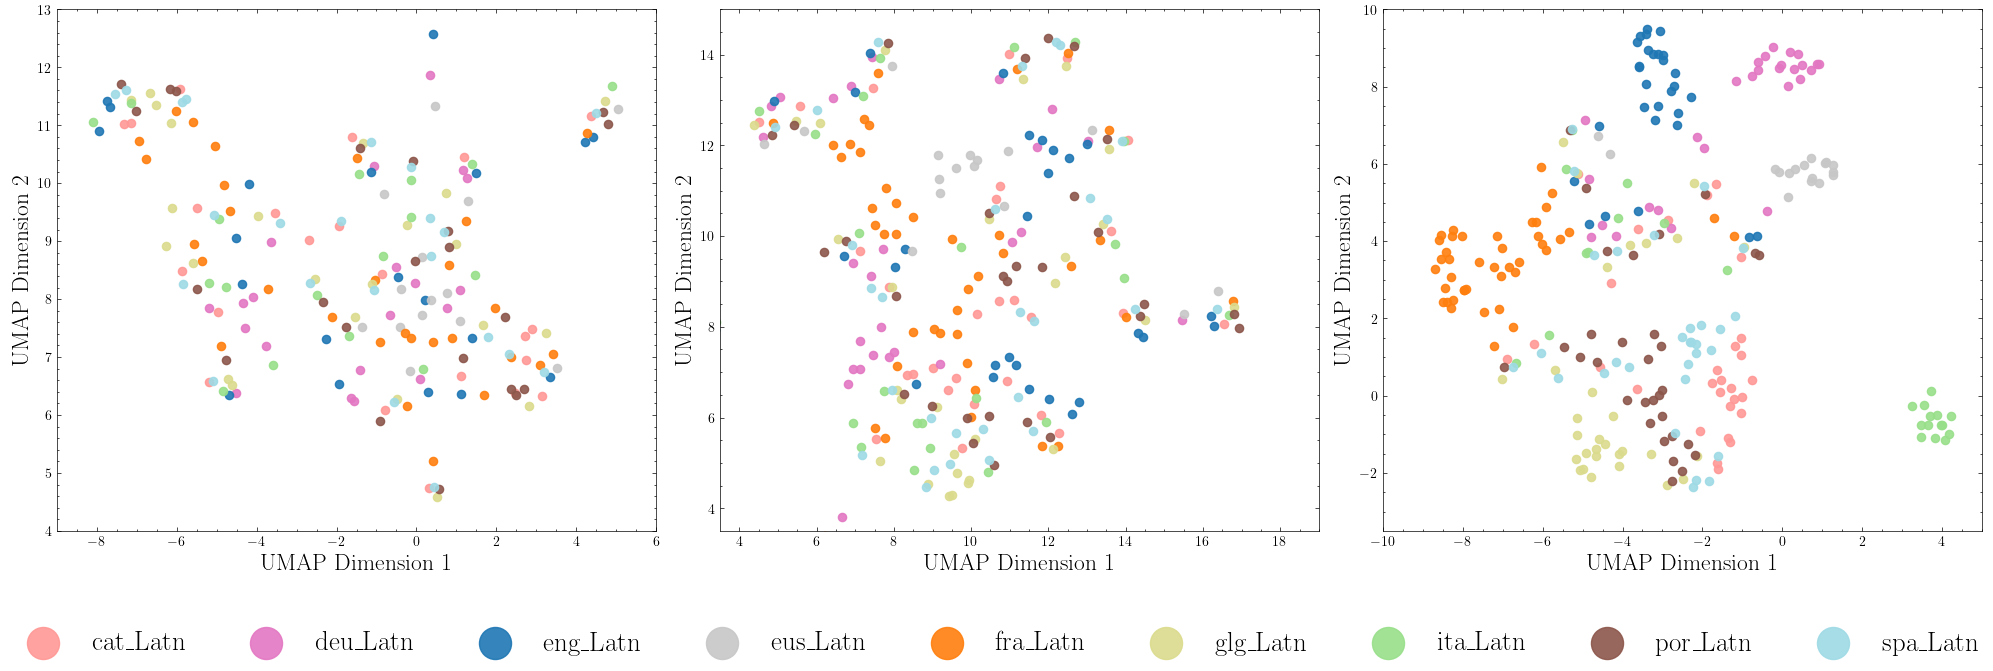

In [ ]:
# Assume df is your DataFrame containing the language codes
unique_lang_codes = df['src_lang_code'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))
lang_to_color = {lang: colors(i) for i, lang in enumerate(unique_lang_codes)}
df['color'] = df['src_lang_code'].map(lang_to_color)

# Create a figure to hold all subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Adjust subplot grid as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, layer in  enumerate([0, 17, 18]):
    # Adjust the matrix path for each layer
    matrix_path = f'{BASE_DIR}/lang_umap_first_target_layer{layer}.npy'
    matrix = np.load(matrix_path)

    ax = axes[i]  # Select the appropriate subplot
    for lang, group in df.groupby('src_lang_code'):
        idx = group.index
        if layer == 0:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=35, color=group['color'].iloc[0], label=lang, alpha=0.9)
        else:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=35, color=group['color'].iloc[0], alpha=0.9)

    if i == 0:
      ax.set_ylim(4, 13)
      ax.set_xlim(-9, 6)
      #ax.set_title('Embedding layer', size=23, pad = 13)
    if i == 1:
      ax.set_ylim(3.5, 15)
      ax.set_xlim(3.5, 19)
      #ax.set_title(f'Layer {layer-1}', size=23, pad = 13)
    if i == 2:
      ax.set_ylim(-3.5, 10)
      ax.set_xlim(-10, 5)
      #ax.set_title(f'Layer {layer-1}', size=23, pad = 13)
    ax.set_xlabel('UMAP Dimension 1', size = 17)
    ax.set_ylabel('UMAP Dimension 2', size = 17)
    #ax.grid(True)

# Adjust layout and add a global legend
fig.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=9, fontsize=19.5, markerscale=3.9)
#fig.legend(title='Source Language Code', bbox_to_anchor=(1.05, 1), loc='lower center')
plt.savefig('umap_plots.pdf', dpi=400)
plt.show()

In [ ]:
matrix_path = '/content/drive/MyDrive/umap_results/checkpoint-385000_gemma32_distributed/lang_umap_first_target_layer18.npy'
matrix = np.load(matrix_path)

<ipython-input-62-a1e3dc59eef5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))


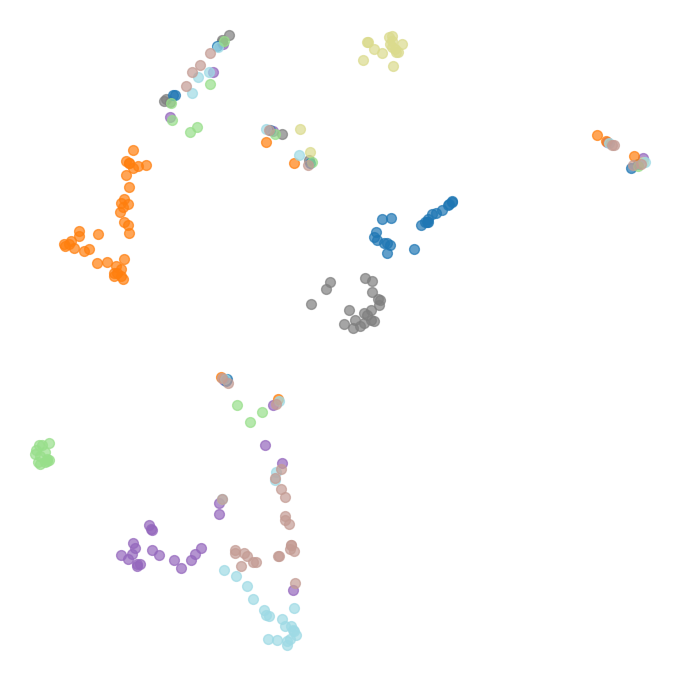

In [ ]:
import matplotlib.pyplot as plt

# Map each unique source language code to a unique color
unique_lang_codes = df['src_lang_code'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))
lang_to_color = {lang: colors(i) for i, lang in enumerate(unique_lang_codes)}

# Assign colors to each row in the DataFrame based on source language code
df['color'] = df['src_lang_code'].map(lang_to_color)

# Create the scatter plot
plt.figure(figsize=(7, 7))  # Adjusted figure size for better fit
for lang, group in df.groupby('src_lang_code'):
    idx = group.index
    plt.scatter(matrix[idx, 0], matrix[idx, 1], s=50, color=group['color'].iloc[0], label=lang, alpha=0.7)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Move the legend below the plot
#plt.legend(title='Source Language Code', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=8, fontsize=9)  # Adjust these values as needed

# Removing the spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='minor', width=0)
ax.tick_params(axis='both', which='major', width=0)
ax.axis(False)

plt.grid(False)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.savefig('layer18.png', dpi=400)
plt.show()

<ipython-input-11-66fc4a04de02>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))


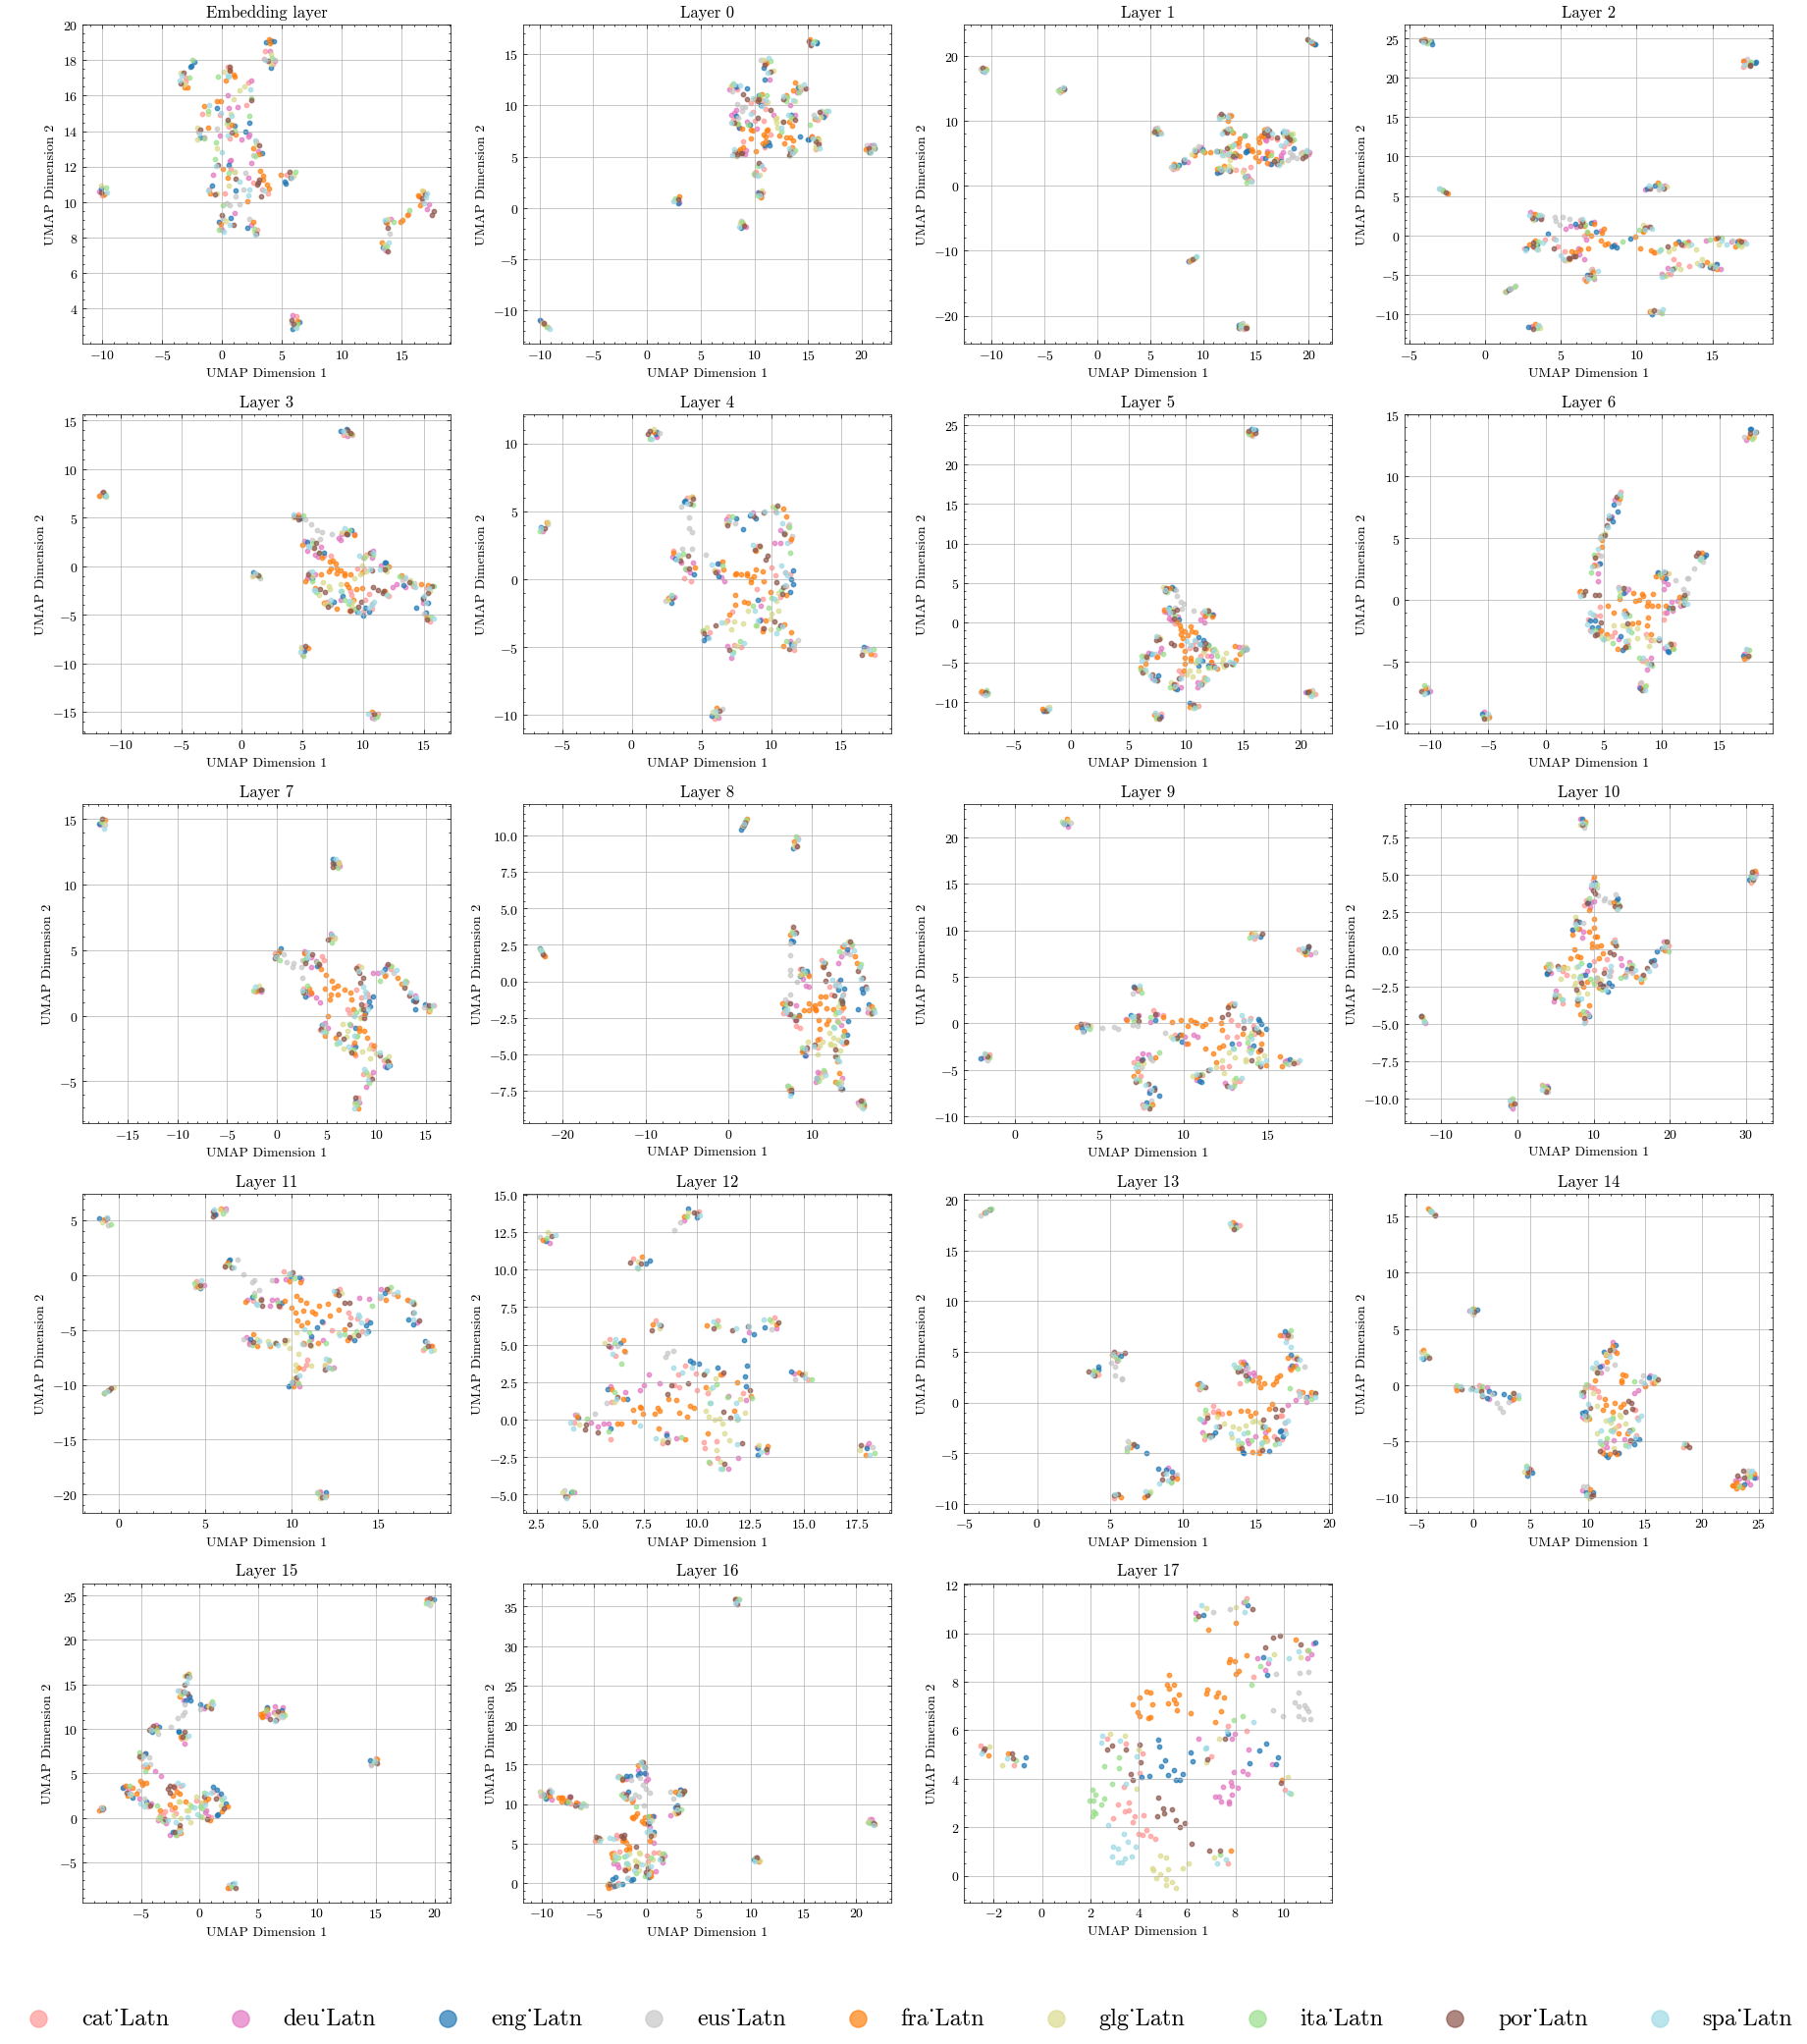

In [ ]:
BASE_DIR = '/content/drive/MyDrive/umap_results/checkpoint-570000_gemma128_distributed/'
df = pd.read_csv( os.path.join(BASE_DIR, 'info_rows_umap_first_target.csv') )

import numpy as np
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the language codes
unique_lang_codes = df['src_lang_code'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))
lang_to_color = {lang: colors(i) for i, lang in enumerate(unique_lang_codes)}
df['color'] = df['src_lang_code'].map(lang_to_color)

# Create a figure to hold all subplots
fig, axes = plt.subplots(5, 4, figsize=(18, 20))  # Adjust subplot grid as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for layer in range(19):
    # Adjust the matrix path for each layer
    matrix_path = f'{BASE_DIR}/lang_umap_first_target_layer{layer}.npy'
    matrix = np.load(matrix_path)

    ax = axes[layer]  # Select the appropriate subplot
    for lang, group in df.groupby('src_lang_code'):
        idx = group.index
        if layer == 0:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=10, color=group['color'].iloc[0], label=lang, alpha=0.7)
          ax.set_title(f'Embedding layer')
        else:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=10, color=group['color'].iloc[0], alpha=0.7)
          ax.set_title(f'Layer {layer-1}')

    ax.set_xlabel('UMAP Dimension 1')
    ax.set_ylabel('UMAP Dimension 2')
    ax.grid(True)

# Hide unused subplots if not a perfect square grid
for i in range(19, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and add a global legend
fig.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=9, fontsize=17.5, markerscale=3.9)
plt.savefig('all_plots_128k.pdf', dpi = 200)
plt.show()

<ipython-input-12-83decd83afb6>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))


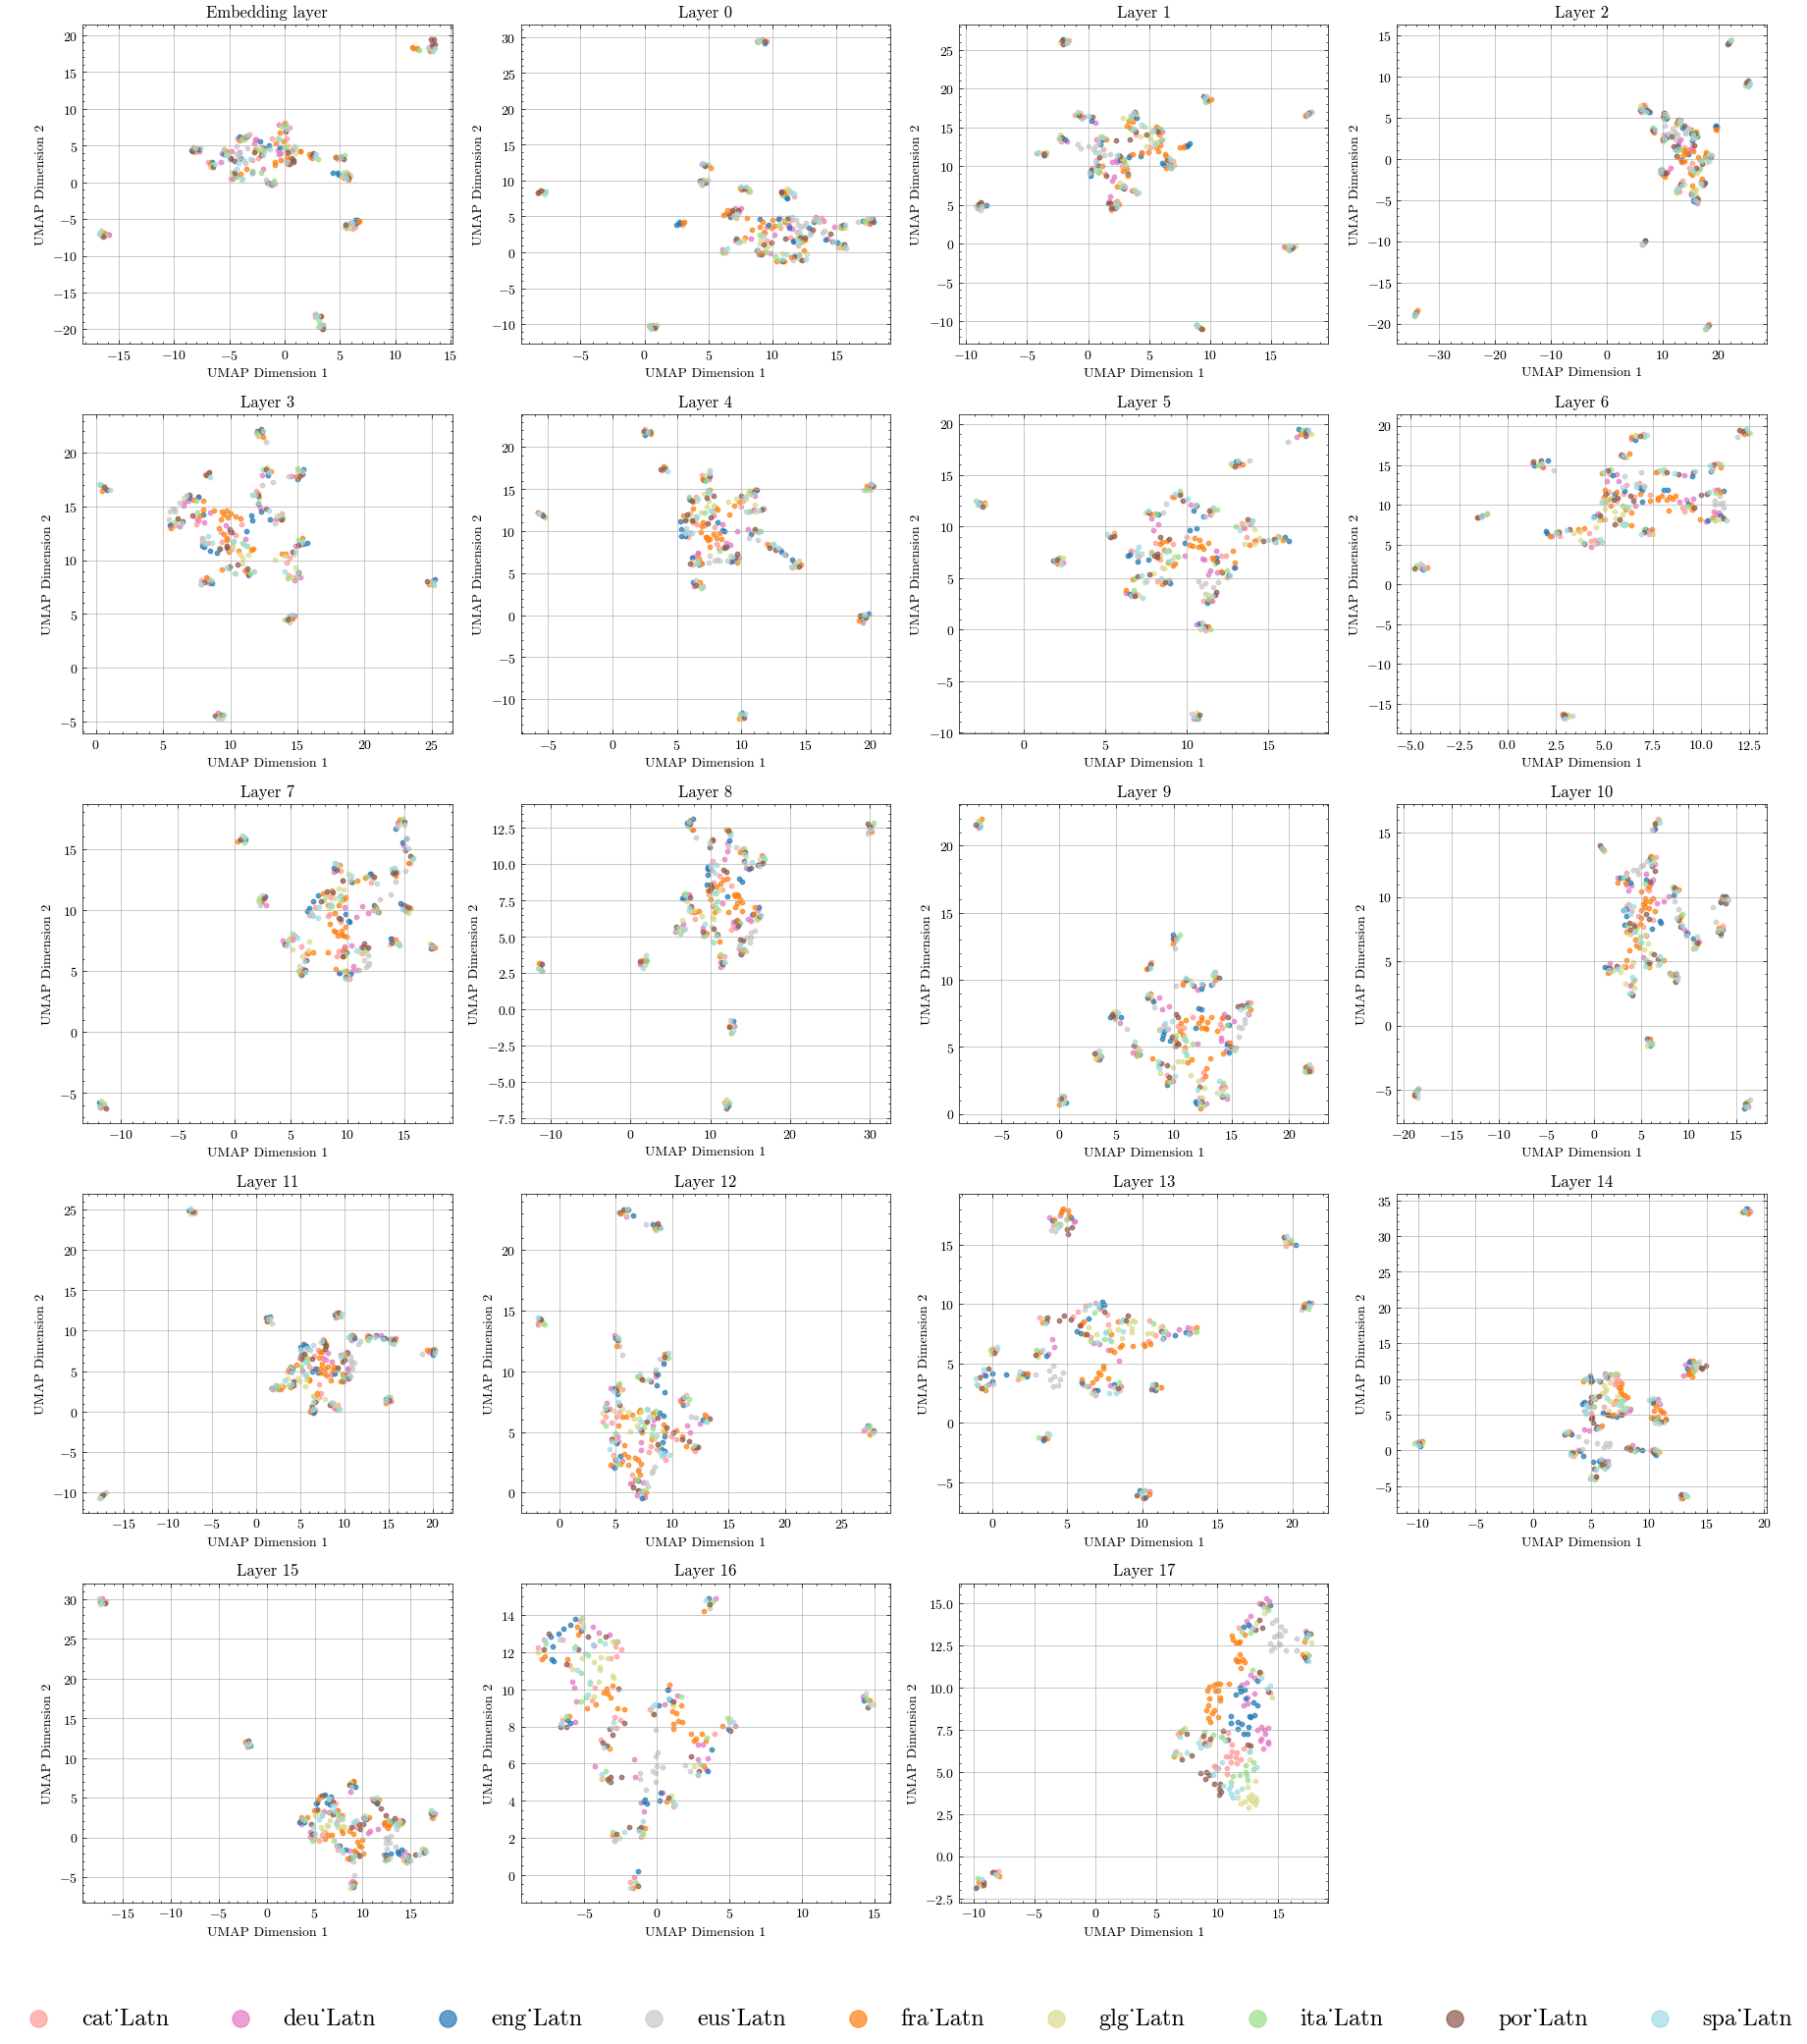

In [ ]:
BASE_DIR = '/content/drive/MyDrive/umap_results/checkpoint-540000_gemma256_distributed/'
df = pd.read_csv( os.path.join(BASE_DIR, 'info_rows_umap_first_target.csv') )

import numpy as np
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing the language codes
unique_lang_codes = df['src_lang_code'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_lang_codes))
lang_to_color = {lang: colors(i) for i, lang in enumerate(unique_lang_codes)}
df['color'] = df['src_lang_code'].map(lang_to_color)

# Create a figure to hold all subplots
fig, axes = plt.subplots(5, 4, figsize=(18, 20))  # Adjust subplot grid as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for layer in range(19):
    # Adjust the matrix path for each layer
    matrix_path = f'{BASE_DIR}/lang_umap_first_target_layer{layer}.npy'
    matrix = np.load(matrix_path)

    ax = axes[layer]  # Select the appropriate subplot
    for lang, group in df.groupby('src_lang_code'):
        idx = group.index
        if layer == 0:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=10, color=group['color'].iloc[0], label=lang, alpha=0.7)
          ax.set_title(f'Embedding layer')
        else:
          ax.scatter(matrix[idx, 0], matrix[idx, 1], s=10, color=group['color'].iloc[0], alpha=0.7)
          ax.set_title(f'Layer {layer-1}')

    ax.set_xlabel('UMAP Dimension 1')
    ax.set_ylabel('UMAP Dimension 2')
    ax.grid(True)

# Hide unused subplots if not a perfect square grid
for i in range(19, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and add a global legend
fig.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=9, fontsize=17.5, markerscale=3.9)
plt.savefig('all_plots_256k.pdf', dpi = 200)
plt.show()